<a href="https://colab.research.google.com/github/abhi-shek-solanki/zeotap/blob/main/Abhishek_Solanki_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK - 3**

In [ ]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the data

df_customers = pd.read_csv('/content/project/Customers.csv')
df_products = pd.read_csv('/content/project/Products.csv')
df_transaction = pd.read_csv('/content/project/Transactions.csv')

In [ ]:
# lets check which are the columns present in our data

df_customers.info()
df_products.info()
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [ ]:
# cheking null values

df_customers.isnull().sum()
df_products.isnull().sum()
df_transaction.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


so there are no null values or outliers we can start our analysis

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import KElbowVisualizer

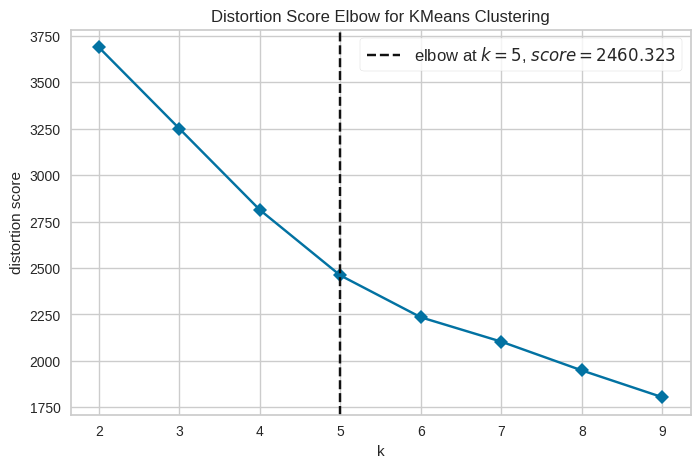

Davies-Bouldin Index: 1.4111
Silhouette Score: 0.2094


In [ ]:
# Step 1: Merge Data on 'CustomerID'
df = df_transaction.merge(df_customers, on="CustomerID", how="left")


# Step 2: Feature Engineering
df['Transaction_Count'] = df.groupby('CustomerID')['TransactionID'].transform('count')
df['Total_Spending'] = df.groupby('CustomerID')['Price'].transform('sum')
df['Avg_Spending'] = df['Total_Spending'] / df['Transaction_Count']


# Selecting relevant features
features = ['ProductID', 'Total_Spending', 'Avg_Spending', 'Transaction_Count', 'Region']


# Encode categorical variables
encoder = LabelEncoder()
df['Region'] = encoder.fit_transform(df['Region'])
df['ProductID'] = encoder.fit_transform(df['ProductID'])


# Extract final feature set
customer_features = df[features]


# Step 3: Normalize Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)


# Step 4: Find Optimal Number of Clusters using Elbow Method
plt.figure(figsize=(8, 5))
visualizer = KElbowVisualizer(KMeans(), k=(2,10), metric='distortion', timings=False)
visualizer.fit(scaled_features)
visualizer.show()



# Step 5: Apply KMeans Clustering
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 6: Evaluate Clustering using DB Index & Silhouette Score
db_index = davies_bouldin_score(scaled_features, df['Cluster'])
silhouette = silhouette_score(scaled_features, df['Cluster'])

print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")


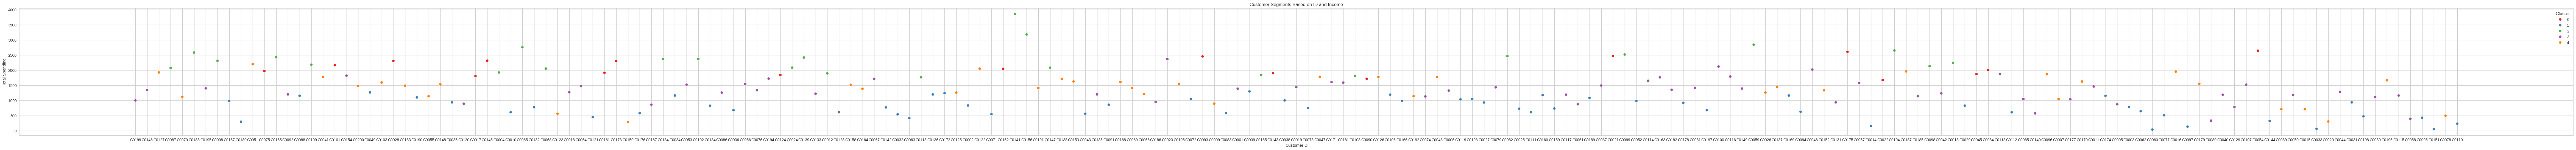

In [ ]:


# Step 7: Visualize Clusters
plt.figure(figsize=(120, 6))
sns.scatterplot(x=df['CustomerID'], y=df['Total_Spending'], hue=df['Cluster'], palette="Set1")
plt.title("Customer Segments Based on ID and Income")
plt.xlabel("CustomerID")
plt.ylabel("Total Spending")
plt.show()
